In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/PYTHON/retail_sales_dataset.csv', sep=';')


In [4]:
display(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34,Beauty,3,50,150
1,2,27/02/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13/01/2023,CUST003,Male,50,Electronics,1,30,30
3,4,21/05/2023,CUST004,Male,37,Clothing,1,500,500
4,5,6/05/2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,16/05/2023,CUST996,Male,62,Clothing,1,50,50
996,997,17/11/2023,CUST997,Male,52,Beauty,3,30,90
997,998,29/10/2023,CUST998,Female,23,Beauty,4,25,100
998,999,5/12/2023,CUST999,Female,36,Electronics,3,50,150


***ANÁLISIS DESCRIPTIVO***

In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34,Beauty,3,50,150
1,2,27/02/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13/01/2023,CUST003,Male,50,Electronics,1,30,30
3,4,21/05/2023,CUST004,Male,37,Clothing,1,500,500
4,5,6/05/2023,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,16/05/2023,CUST996,Male,62,Clothing,1,50,50
996,997,17/11/2023,CUST997,Male,52,Beauty,3,30,90
997,998,29/10/2023,CUST998,Female,23,Beauty,4,25,100
998,999,5/12/2023,CUST999,Female,36,Electronics,3,50,150
999,1000,12/04/2023,CUST1000,Male,47,Electronics,4,30,120


In [7]:
df.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [8]:
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
58,59,5/07/2023,CUST059,Male,62,Clothing,1,50,50
197,198,7/03/2023,CUST198,Female,54,Beauty,3,300,900
349,350,17/10/2023,CUST350,Male,25,Beauty,3,25,75
877,878,30/06/2023,CUST878,Female,20,Clothing,1,30,30
694,695,12/08/2023,CUST695,Female,22,Electronics,3,50,150


In [9]:
df.shape

(1000, 9)

In [10]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [12]:
df.describe(include=[np.number])

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**LIMPIEZA DE DATOS**

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
display(df.dtypes)

/tmp/ipython-input-452125363.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


*****EDA*****


In [14]:
age=df['Age'].mean()
max=df['Age'].max()
min=df['Age'].min()
print(f'La edad máxima de los clientes es {max}, la minima es {min}. Por lo tanto, el promedio es {age}')

La edad máxima de los clientes es 64, la minima es 18. Por lo tanto, el promedio es 41.392


In [15]:
conteo=df['Gender'].value_counts()
mujer=conteo['Female']
hombre=conteo['Male']
print(f'Hay {mujer} clientes mujeres y {hombre} clientes hombres')

Hay 510 clientes mujeres y 490 clientes hombres


In [16]:
producto = df['Product Category'].value_counts()
ropa = producto['Clothing']
electronica = producto['Electronics']
belleza = producto['Beauty']
print(f'Se venden unidades en Ropa, Electrodomésticos y Productos de Belleza, {ropa},{electronica} y {belleza} respectivamente. Hay {producto.sum()} unidades totales')

Se venden unidades en Ropa, Electrodomésticos y Productos de Belleza, 351,342 y 307 respectivamente. Hay 1000 unidades totales


*CREACIÓN DEL COSTO DE VENTAS*

In [17]:
df['Costo_Total'] = df['Total Amount']*0.60

In [18]:
df['Margen'] =df['Total Amount']-df['Costo_Total']

In [19]:
display(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Costo_Total,Margen
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,90.0,60.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,600.0,400.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,18.0,12.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,300.0,200.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,60.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,30.0,20.0
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,54.0,36.0
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,60.0,40.0
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,90.0,60.0


***Insights Clave***

In [20]:
producto=df.groupby('Product Category')['Total Amount'].sum()
beauty=producto['Beauty']
clothing=producto['Clothing']
electronics=producto['Electronics']
display(producto)
print(f'La categoria Beauty suma {beauty}u.m; la Clothing, {clothing} u.m y la electronics {electronics} u.m')

,Total Amount
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


La categoria Beauty suma 143515u.m; la Clothing, 155580 u.m y la electronics 156905 u.m


In [21]:
df.groupby('Gender')['Margen'].mean()

,Margen
Gender,
Female,182.619608
Male,182.171429


In [22]:
df['Mes'] = df['Date'].dt.to_period('M')
ventasmes = df.groupby('Mes')['Total Amount'].sum()
display(ventasmes)

,Total Amount
Mes,
2023-01,35450
2023-02,44060
2023-03,28990
2023-04,33870
2023-05,53150
2023-06,36715
2023-07,35465
2023-08,36960
2023-09,23620


**GRÁFICOS**

Text(0, 0.5, 'Monto')

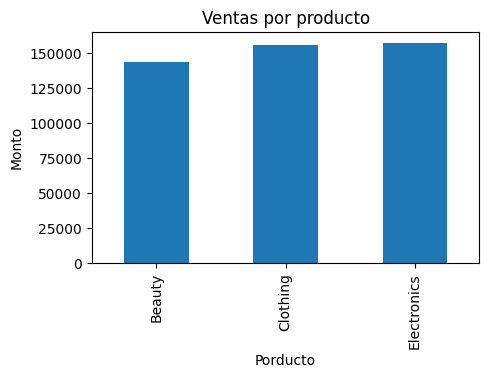

In [23]:
g1=df.groupby('Product Category')['Total Amount'].sum()
g1.plot(kind='bar',figsize=(5,3))
plt.title('Ventas por producto')
plt.xlabel('Porducto')
plt.ylabel('Monto')

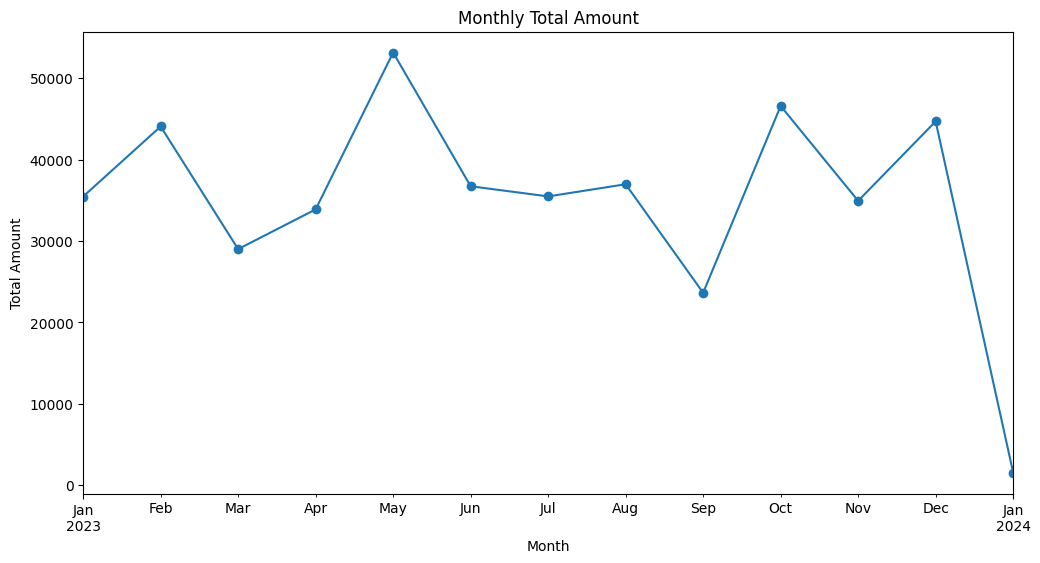

In [24]:
plt.figure(figsize=(12, 6))
ventasmes.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Monthly Total Amount')
plt.show()

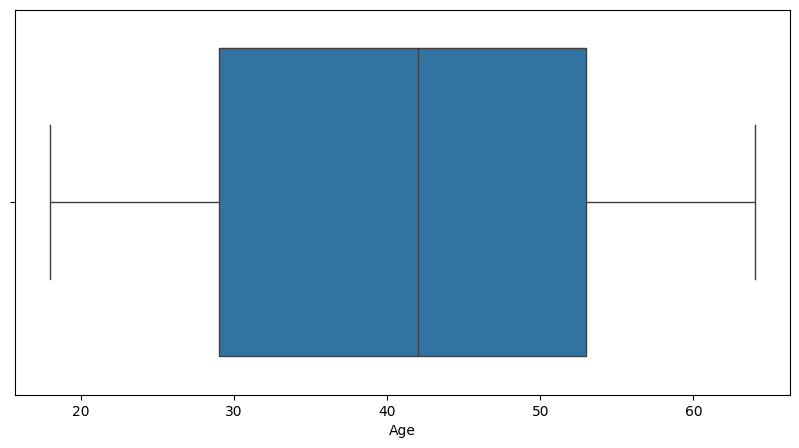

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Age')
plt.show()

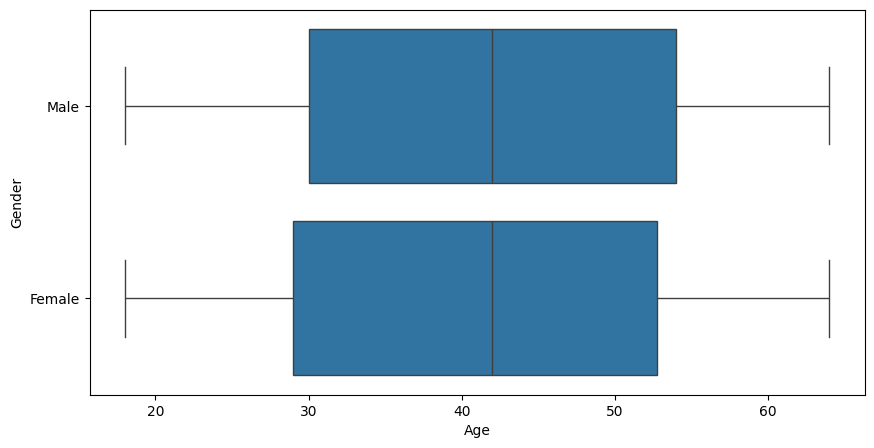

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Age', y='Gender')
plt.show()

Text(0, 0.5, 'Frecuencia')

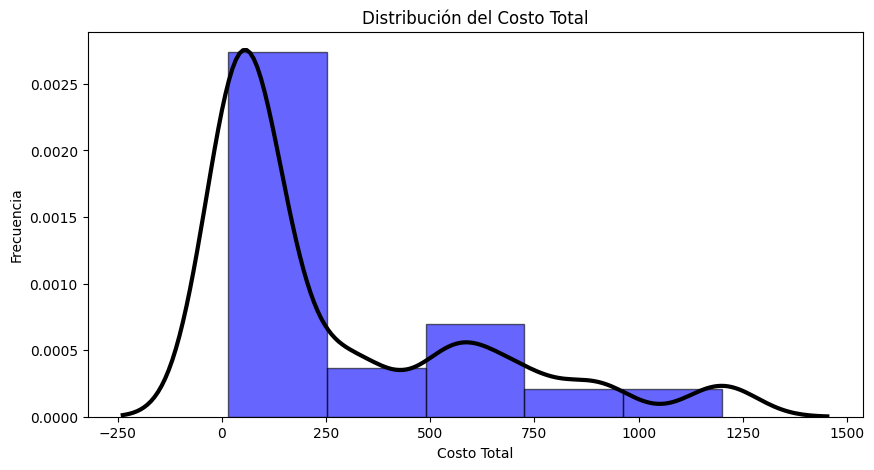

In [27]:
plt.figure(figsize=(10,5))
df['Costo_Total'].plot(kind='hist',bins=5,density=True,alpha=0.6,color='blue',edgecolor='black')
sns.kdeplot(df['Costo_Total'],color='black',linewidth=3)
plt.title('Distribución del Costo Total')
plt.xlabel('Costo Total')
plt.ylabel('Frecuencia')

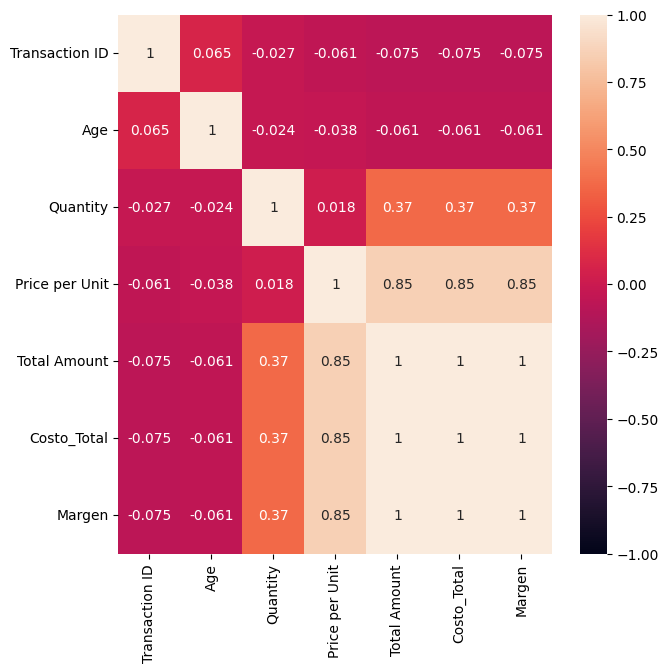

In [28]:
plt.figure(figsize=(7,7))
cor_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(cor_matrix, annot=True,vmin=-1)
plt.show()

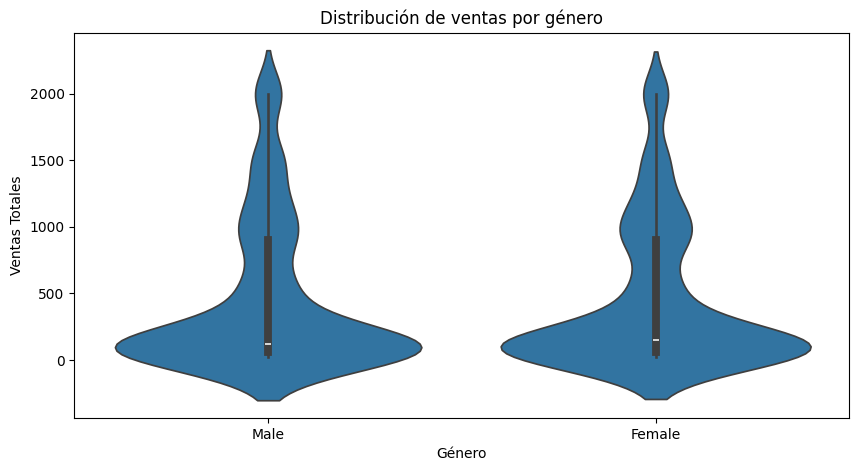

In [29]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df,x='Gender',y='Total Amount')
plt.title('Distribución de ventas por género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.show()

/tmp/ipython-input-1009994288.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g_age_margin = df.groupby('Age_Group')['Margen'].mean()


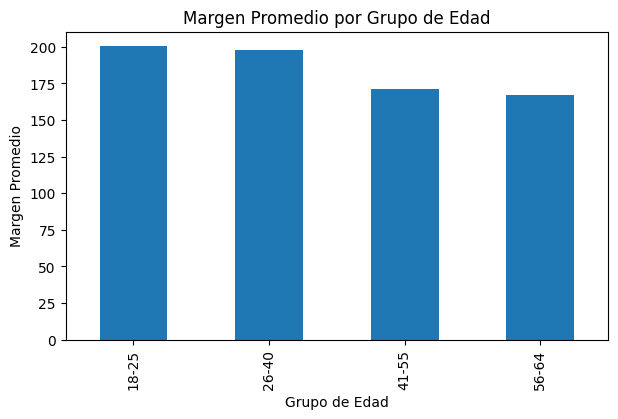

In [30]:
bins = [18, 25, 40, 55, 65]
labels = ['18-25', '26-40', '41-55', '56-64']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

g_age_margin = df.groupby('Age_Group')['Margen'].mean()
g_age_margin.plot(kind='bar', figsize=(7,4))
plt.title('Margen Promedio por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Margen Promedio')
plt.show()